# 0 Mise en place des fonctions de travail 

In [94]:
import random
import timeit
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.nonparametric.kernel_regression import KernelReg

# Import new magic commands
%reload_ext line_profiler

def u_array(debug=False, N=21):
    """
    Retourne un tableau non trie avec des valeur de 1 <= i < N .
    Par defaut un tableau  1 <= i < 21
    
    Pour tester vos algorithmes, vous pouvez passer l'argument debug=True
    dans ce cas, l'algorithme vous donne toujour le meme tableau :
    
    [3, 9, 7, 1, 6, 2, 8, 4, 5]
    
    """
    if debug:
        return [3, 9, 7, 1, 6, 2, 8, 4, 5]
    
    array = list(range(1,N))
    random.shuffle(array)

    return array

In [2]:
# Exemple d'utilisation de la fonction precedente

print(u_array()) # Retourne un tableau avec des nombres naturels allant de 1 a 20
print(u_array(True)) # Retourne le tableau [3, 9, 7, 1, 6, 2, 8, 4, 5]
print(u_array(N=31)) # Des nombres naturels allant de 1 a 30

[11, 14, 13, 15, 20, 4, 19, 2, 8, 1, 7, 5, 16, 12, 17, 6, 9, 3, 10, 18]
[3, 9, 7, 1, 6, 2, 8, 4, 5]
[17, 14, 27, 22, 3, 1, 10, 12, 13, 7, 25, 6, 8, 4, 18, 16, 2, 28, 15, 20, 24, 29, 30, 11, 5, 9, 26, 23, 19, 21]


In [3]:
def swap(A, i, j):
    # Store in multivariable assignement
    #print(f"Swap {A[i]} with {A[j]}")
    #print(A)
    A[i], A[j] = A[j], A[i]
    #print(A)

In [4]:
swap(u_array(True), 1, 4)
# print(u_array(True))

# 1 Les tris classiques 

## 1.1 Tri à bulles

**Un pseudocode possible** *(source : Wikipedia)*

```
procedure tri_à_bulles(Tableau T)
   pour i allant de (taille de T)-1 à 1
       pour j allant de 0 à i-1
           si T[j+1] < T[j] alors
               échanger(T[j+1], T[j])
       fin pour
   fin pour
        
```

In [5]:
def is_sorted(A:list) -> bool:
    is_sorted=True
    for i in range(0, len(A)-1):
        if not A[i+1] > A[i]:
            is_sorted=False
    return is_sorted

In [15]:
def bubble(A):
    """
    les grands valeurs remontent aux derniers position du tableau
    comme des bulles d'air dans l'eau
    """
    #print(f"Before bubble : {A}")
    for i in range(len(A)-1, 0, -1):
        #print(f"Main loop --> {i}")
        for j in range(0, i):
            if A[j+1]<=A[j]:
                swap(A, j+1, j)
    #print(f"After bubble : {A}")
    # print(f"is_sorted => {is_sorted(A)}")
        

In [7]:
bubble(u_array())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

## 1.2 Insertion

**Un pseudocode possible** *(source : Wikipedia)*

```
procédure tri_insertion(tableau T, entier n)

  pour i de 1 à n - 1
        # mémoriser T[i] dans x
        x ← T[i]                            

        j ← i                               
        tant que j > 0 et T[j - 1] > x
                 T[j] ← T[j - 1]
                 j ← j - 1

        # placer x dans le "trou" laissé par le décalage
        T[j] ← x 
```

In [8]:
def insertion(A):
    """
    on cherche la place ou va etre positionne l'i_eme element 
    """
    # print(f"Input = {A}")
    for i in range(1, len(A)):
        # print(f"---> i = {i}")
        x=A[i]
        j=i        
        
        while (j>0 and A[j-1] > x):
            # print(f"------> j = {j}")
            # print(f"Avant swap = {A}")
            #swap(A, j, j-1)
            A[j]=A[j-1]
            j-=1
            # print(f"Apres swap = {A}")

        A[j]=x
    # print(f"After : {A}")


In [9]:
insertion(u_array(True))

## 1.3 Selection

**Un pseudocode possible** *(source : Wikipedia)*

```
procédure tri_selection(tableau t, entier n)
  pour i de 0 à n - 2
      min ← i       
      pour j de i + 1 à n - 1
          si t[j] < t[min], alors min ← j
      fin pour
      si min ≠ i, alors échanger t[i] et t[min]
  fin pour
fin procédure
```

In [10]:
def selection(A):
    """
    on cherche l'element qui doit se placer a l'i_eme place
    """
    # print(f"Before = {A}")
    for i in range(len(A)-1):
        # print(f"---> {i}")
        mini=i
        for j in range(i+1, len(A)):
            # print(f"------> {j}")
            if A[j]<A[mini]:
                # print(f"FOUND ==> {A[j]} plus petit que {A[i]}")
                mini = j
        if i != mini:
            # print("SWAPING")
            swap(A, i, mini)
            # print(A)
    # print(f"After = {A}")


In [11]:
selection(u_array())

# Time computation study

In [12]:
N=1000
#u_array(False,N)

## Study of different method :

In [59]:
def timeStudy(timeDict:dict):
    for i in range(100,5000, 200):
        A = u_array(False,i)
        
        def bubbleSort():
            B = A.copy()
            bubble(B)
        def insertionSort():
            B = A.copy()
            insertion(B)
        def selectionSort():
            B = A.copy()
            selection(B)
        
        timeMeasure = round(timeit.timeit(bubbleSort, number=7)/7 * 1000, 2)
        timeDict["bubble"][i] = timeMeasure
        print(f"algo = bubble => --> {i} <-- Time --> : {timeMeasure} miliS")
        
        A = u_array(False,i)
        timeMeasure = round(timeit.timeit(insertionSort, number=7)/7 * 1000, 2)
        timeDict["insertion"][i] = timeMeasure
        print(f"algo = insertion => --> {i} <-- Time --> : {timeMeasure} miliS")
        
        A = u_array(False,i)
        timeMeasure = round(timeit.timeit(selectionSort, number=7)/7 * 1000, 2)
        timeDict["selection"][i] = timeMeasure
        print(f"algo = selection => --> {i} <-- Time --> : {timeMeasure} miliS")


In [60]:
timeDict = {
    "bubble":{},
    "insertion": {},
    "selection": {}
}        

timeStudy(timeDict)

algo = bubble => --> 100 <-- Time --> : 2.22 miliS
algo = insertion => --> 100 <-- Time --> : 0.85 miliS
algo = selection => --> 100 <-- Time --> : 0.53 miliS
algo = bubble => --> 300 <-- Time --> : 8.88 miliS
algo = insertion => --> 300 <-- Time --> : 2.35 miliS
algo = selection => --> 300 <-- Time --> : 2.15 miliS
algo = bubble => --> 500 <-- Time --> : 15.81 miliS
algo = insertion => --> 500 <-- Time --> : 9.04 miliS
algo = selection => --> 500 <-- Time --> : 6.75 miliS
algo = bubble => --> 700 <-- Time --> : 32.76 miliS
algo = insertion => --> 700 <-- Time --> : 15.14 miliS
algo = selection => --> 700 <-- Time --> : 13.48 miliS
algo = bubble => --> 900 <-- Time --> : 55.85 miliS
algo = insertion => --> 900 <-- Time --> : 28.19 miliS
algo = selection => --> 900 <-- Time --> : 23.24 miliS
algo = bubble => --> 1100 <-- Time --> : 82.86 miliS
algo = insertion => --> 1100 <-- Time --> : 36.71 miliS
algo = selection => --> 1100 <-- Time --> : 31.64 miliS
algo = bubble => --> 1300 <-- Tim

In [95]:
#timeDict

In [96]:
res = % timeit 

UsageError: Line magic function `%` not found.


In [ ]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

from statsmodels.nonparametric.kernel_regression import KernelReg
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 0.2

kr = KernelReg(y,x,'c')
plt.plot(x, y, '+')
y_pred, y_std = kr.fit(x)

plt.plot(x, y_pred)
plt.show()

In [101]:
def plotComplexity(sizes,timesB,timesI,timesS):
    """
    Plot la comparaison des performances en termes de temps des 3 différents algos
    """
    
    krB = KernelReg(timesB, sizes, 'c')
    y_pred_B, y_std_B = krB.fit(sizes)
    
    krI = KernelReg(timesI, sizes, 'c')
    y_pred_I, y_std_B = krB.fit(sizes)
    
        krB = KernelReg(timesB, sizes, 'c')
    y_pred_B, y_std_B = krB.fit(sizes)
    
    plt.style.use('ggplot')
    fig, ax = plt.subplots(1, 1, tight_layout=True, figsize=(6,4))

    ax.set_title("Performance en terme de temps")
    ax.set_xlabel("Taille de tableau")
    ax.set_ylabel("Temps (mili s)")

    ax.plot(sizes,timesB,label='Bubble')
    ax.plot(sizes,timesI,label='Insertion')
    ax.plot(sizes,timesS,label='Selection')
    ax.plot(sizes,y_pred_B,label='lissageB', c="grey")
    ax.plot(sizes,y_pred_B,label='lissageB')
    ax.plot(sizes,y_pred_B,label='lissageB')

    handles, labels = ax.get_legend_handles_labels()    
    ax.legend(handles=handles,     # The line objects #ax.legend si légende dans le graphe, fig.legend en-dehors
               ncol=1, 
               labels=labels,   # The labels for each line
               loc="upper left",   # Position of legend : lower center
               borderaxespad=0.8    # Small spacing around legend box
    #              title="Legend"  # Title for the legend
               )

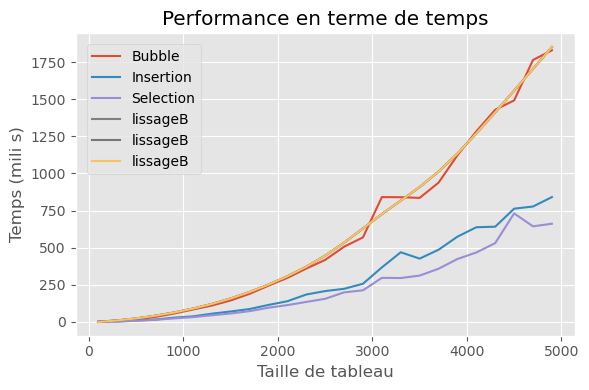

In [102]:
N = list(timeDict[list(timeDict.keys())[0]].keys())
bubbleList = list(timeDict[list(timeDict.keys())[0]].values())
insertionList = list(timeDict[list(timeDict.keys())[1]].values())
selectionList = list(timeDict[list(timeDict.keys())[2]].values())

plotComplexity(N, bubbleList, insertionList, selectionList)